In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("Academic_Performance.csv")

In [3]:
df.head()

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,71.0,93.0,71.0,93.0,79.0,91,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,97.0,38.0,86.0,98.0,78.0,92,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,17.0,1.0,18.0,43.0,22.0,7,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,65.0,35.0,76.0,80.0,48.0,67,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,94.0,94.0,98.0,100.0,71.0,98,FIRST CLASS


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT_ID          12411 non-null  object 
 1   GENDER              12389 non-null  object 
 2   PLACEMENT           12396 non-null  object 
 3   HONOR_OPTED_OR_NOT  12397 non-null  object 
 4   EDUCATION_TYPE      12396 non-null  object 
 5   ACADEMIC_PROGRAM    12377 non-null  object 
 6   COURSE 1 MARKS      12400 non-null  float64
 7   COURSE 2 MARKS      12403 non-null  float64
 8   COURSE 3 MARKS      12397 non-null  float64
 9   COURSE 4 MARKS      12397 non-null  float64
 10  COURSE 5 MARKS      12389 non-null  float64
 11  PERCENTILE          12411 non-null  int64  
 12  OVEARLL_GRADE       12411 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [5]:
missing_values=df.isnull().sum()
print(missing_values)

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64


In [6]:
df.dropna(subset=['GENDER'], inplace=True)
df.isnull().sum()

STUDENT_ID             0
GENDER                 0
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        14
ACADEMIC_PROGRAM      28
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        13
COURSE 4 MARKS        12
COURSE 5 MARKS        21
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [7]:
df['COURSE 1 MARKS']=df['COURSE 1 MARKS'].replace(np.NaN,df['COURSE 1 MARKS'].median())
df['COURSE 2 MARKS']=df['COURSE 2 MARKS'].replace(np.NaN,df['COURSE 2 MARKS'].median())
df['COURSE 3 MARKS']=df['COURSE 3 MARKS'].replace(np.NaN,df['COURSE 3 MARKS'].median())
df['COURSE 4 MARKS']=df['COURSE 4 MARKS'].replace(np.NaN,df['COURSE 4 MARKS'].median())
df['COURSE 5 MARKS']=df['COURSE 5 MARKS'].replace(np.NaN,df['COURSE 5 MARKS'].median())

df.isnull().sum()

STUDENT_ID             0
GENDER                 0
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        14
ACADEMIC_PROGRAM      28
COURSE 1 MARKS         0
COURSE 2 MARKS         0
COURSE 3 MARKS         0
COURSE 4 MARKS         0
COURSE 5 MARKS         0
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='missing')
x = imputer.fit_transform(df[['ACADEMIC_PROGRAM']])
print(x)

pd.isnull(x).sum()

[['INDUSTRIAL ENGINEERING']
 ['INDUSTRIAL ENGINEERING']
 ['ELECTRONIC ENGINEERING']
 ...
 ['INDUSTRIAL ENGINEERING']
 ['missing']
 ['INDUSTRIAL ENGINEERING']]


0

In [9]:
imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(df[['EDUCATION_TYPE']])
print(y)

pd.isnull(y).sum()

[['ACADEMIC']
 ['ACADEMIC']
 ['ACADEMIC']
 ...
 ['ACADEMIC']
 ['ACADEMIC']
 ['ACADEMIC']]


0

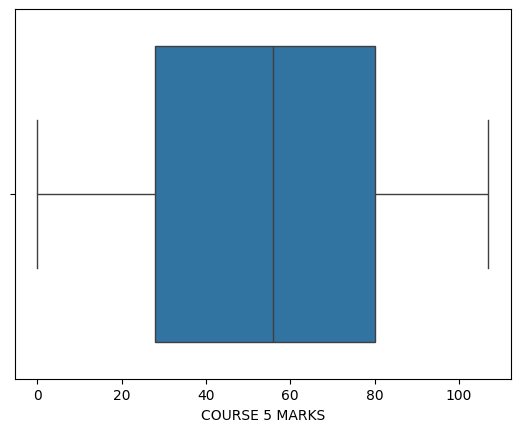

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df,x=df['COURSE 5 MARKS'])

plt.show()

In [11]:
#Detecting Outliers with Z-scores
import numpy as np
outliers = []

def outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

col_outliers = outliers_zscore(df['COURSE 1 MARKS'])
print("Outliers from Z-scores method: ", col_outliers)

Outliers from Z-scores method:  [6.0, 3.0, 1.0, 5.0, 2.0, 8.0, 7.0, 2.0, 8.0, 6.0, 9.0, 2.0, 9.0, 8.0, 1.0, 9.0, 2.0, 2.0, 1.0, 6.0, 7.0, 4.0, 5.0, 9.0, 7.0, 9.0, 1.0, 2.0, 8.0, 5.0, 2.0, 8.0, 8.0, 1.0, 4.0, 7.0, 4.0, 7.0, 8.0, 3.0, 8.0, 5.0, 9.0, 7.0, 8.0, 7.0, 1.0, 9.0, 2.0, 7.0, 5.0, 3.0, 7.0, 3.0, 8.0, 6.0, 9.0, 8.0, 9.0, 6.0, 1.0, 7.0, 8.0, 1.0, 9.0, 1.0, 7.0, 8.0, 9.0, 6.0, 7.0, 7.0, 8.0, 4.0, 6.0, 6.0, 5.0, -1.0, 8.0, 8.0, 3.0, 1.0, 3.0, 3.0, 2.0, 9.0, 8.0, 3.0, 6.0, 3.0, 2.0, 7.0, 8.0, 4.0, 8.0, 3.0, 7.0, 9.0, 9.0, 3.0, 7.0, 6.0, 1.0, 1.0, 1.0, -1.0, 9.0, 4.0, 8.0, 7.0, 1.0, 6.0]


In [12]:
#Detecting Outliers with IQR
outliers = []
def outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(lwr_bound, upr_bound)
    for i in data:
         if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

marks_outliers = outliers_iqr(df['COURSE 2 MARKS'])
print("Outliers from IQR method: ", marks_outliers)

-24.0 152.0
Outliers from IQR method:  []


In [19]:
categorical1 = df.select_dtypes(exclude=[np.number])
categorical1

,STUDENT_ID,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,SB11201210000129,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
1,SB11201210000137,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,THIRD CLASS
2,SB11201210005154,M,No,Yes,ACADEMIC,ELECTRONIC ENGINEERING,DISTINCTION
3,SB11201210007504,F,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
4,SB11201210007548,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
...,...,...,...,...,...,...,...
12406,SB11201420568705,M,Yes,Yes,ACADEMIC,MECHATRONICS ENGINEERING,FIRST CLASS
12407,SB11201420573045,M,Yes,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12408,SB11201420578809,M,Yes,No,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
12409,SB11201420578812,F,Yes,Yes,ACADEMIC,NaN,FIRST CLASS


In [20]:
categorical1.PLACEMENT.value_counts()

PLACEMENT
Yes    9720
No     2654
Name: count, dtype: int64

In [21]:
categorical1.PLACEMENT.replace({"Yes":1, "No":0}, inplace= True)
categorical.head()

,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
1,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,THIRD CLASS
2,M,0.0,Yes,ACADEMIC,ELECTRONIC ENGINEERING,DISTINCTION
3,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
4,M,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS


In [23]:
#we choosing Label Encoding as it contain categorical columns
categorical1 = categorical1.drop('STUDENT_ID',axis=1) #dropping due to not catagorical column
categorical1.head()

,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
1,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,THIRD CLASS
2,M,0.0,Yes,ACADEMIC,ELECTRONIC ENGINEERING,DISTINCTION
3,F,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS
4,M,1.0,Yes,ACADEMIC,INDUSTRIAL ENGINEERING,FIRST CLASS


In [28]:
column_category = categorical1.select_dtypes(exclude=[np.number]).columns 
column_category

Index(['GENDER', 'HONOR_OPTED_OR_NOT', 'EDUCATION_TYPE', 'ACADEMIC_PROGRAM',
       'OVEARLL_GRADE'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in column_category:
    categorical1[i] = label_encoder.fit_transform(categorical1[i])
print("Label Encoded Data: ")
categorical1.head()

Label Encoded Data: 


,GENDER,PLACEMENT,HONOR_OPTED_OR_NOT,EDUCATION_TYPE,ACADEMIC_PROGRAM,OVEARLL_GRADE
0,0,1.0,1,0,13,1
1,0,1.0,1,0,13,3
2,1,0.0,1,0,10,0
3,0,1.0,1,0,13,1
4,1,1.0,1,0,13,1


In [31]:
#One Hot Encoding used because data is further divided into n number of columns
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
onehot_encoded = onehot_encoder.fit_transform(categorical1[column_category])

onehot_encoded

array([[1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [32]:
onehot_encoded_frame = pd.DataFrame(onehot_encoded, columns = onehot_encoder.get_feature_names_out(column_category))

onehot_encoded_frame.head()

,GENDER_0,GENDER_1,HONOR_OPTED_OR_NOT_0,HONOR_OPTED_OR_NOT_1,HONOR_OPTED_OR_NOT_2,EDUCATION_TYPE_0,EDUCATION_TYPE_1,EDUCATION_TYPE_2,EDUCATION_TYPE_3,EDUCATION_TYPE_4,...,ACADEMIC_PROGRAM_16,ACADEMIC_PROGRAM_17,ACADEMIC_PROGRAM_18,ACADEMIC_PROGRAM_19,ACADEMIC_PROGRAM_20,ACADEMIC_PROGRAM_21,OVEARLL_GRADE_0,OVEARLL_GRADE_1,OVEARLL_GRADE_2,OVEARLL_GRADE_3
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
